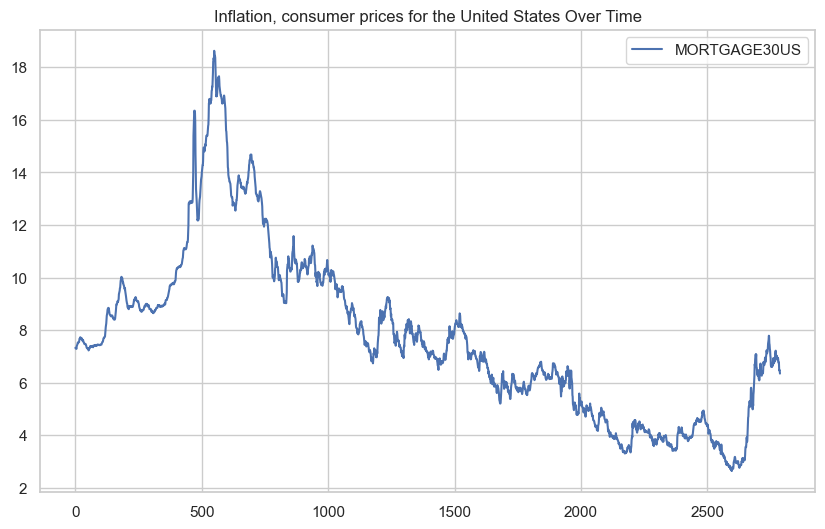

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima.model import ARIMA

# For better visualization
sns.set(style="whitegrid")
%matplotlib inline

#FPCPITOTLZGUSA.csv
#MORTGAGE30US.csv
data = pd.read_csv('MORTGAGE30US.csv')

data.plot(figsize=(10,6))
plt.title("Inflation, consumer prices for the United States Over Time")
plt.show()

ADF Statistic: -17.40647979390229
p-value: 4.9134290811408986e-30


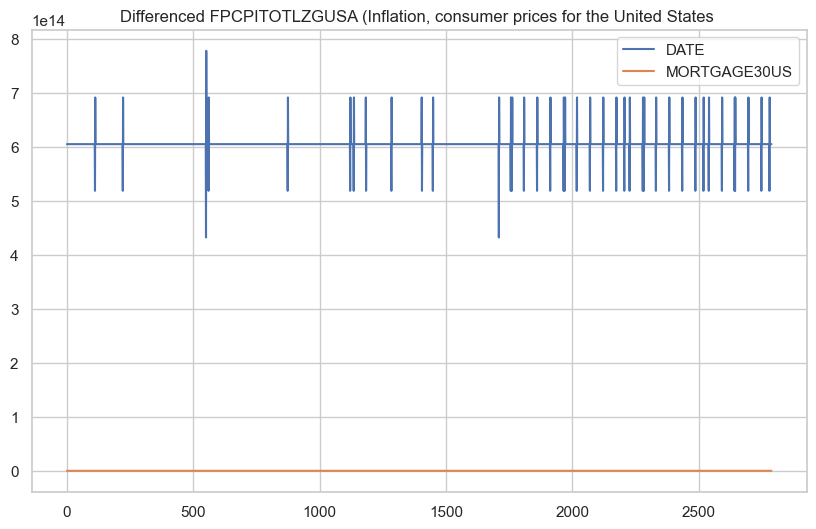

In [23]:
result = adfuller(data['MORTGAGE30US'].diff().dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
data['DATE'] = pd.to_datetime(data['DATE'])
data_diff = data.diff().dropna()
data_diff.plot(figsize=(10,6))
plt.title("Differenced MORTGAGE30US (Mortgage for the United States ")
plt.show()

In [25]:
data1 = pd.read_csv('MORTGAGE30US.csv')
print(data1.dtypes)

data1['DATE'] = pd.to_numeric(data1['DATE'], errors='coerce')
data1_diff = data1.diff().dropna()
print(len(data1_diff))

if len(data1_diff) > 1:
    # Adjust max_lags dynamically if there's enough data
    max_lags = min(20, len(data1_diff) // 2)
    from statsmodels.graphics.tsaplots import plot_pacf
    plot_pacf(data1_diff, lags=max_lags, method='ywmle')
    plt.show()
else:
    print("Not enough data points after differencing to compute PACF.")

DATE             object
MORTGAGE30US    float64
dtype: object
0
Not enough data points after differencing to compute PACF.
